In [1]:
import pandas as pd
df = pd.read_csv("boston.csv")

In [44]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Using train_test_split to get training and test data

In [2]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [4]:
print(df.shape, train_df.shape, test_df.shape)

(506, 14) (404, 14) (102, 14)


### Using train_test_split in feature-target sets

In [6]:
X = df.drop(['MEDV'], axis=1)
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


### Using LinearRegression

In [8]:
from sklearn.linear_model import LinearRegression
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

#### Calculating r square score on both training and test sets using the model

In [9]:
r2_score = round(reg_all.score(X_train, y_train), 4)
print(f"Training score: {r2_score}")

Training score: 0.7509


In [10]:
y_pred = reg_all.predict(X_test)
r2_score_test = round(reg_all.score(X_test, y_test), 4)
print(f"Test score: {r2_score_test}")

Test score: 0.6688


#### Calculating mean square error for?

In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np
error = mean_squared_error(y_test, y_pred)
np.sqrt(error)

4.928602182665332

<AxesSubplot:>

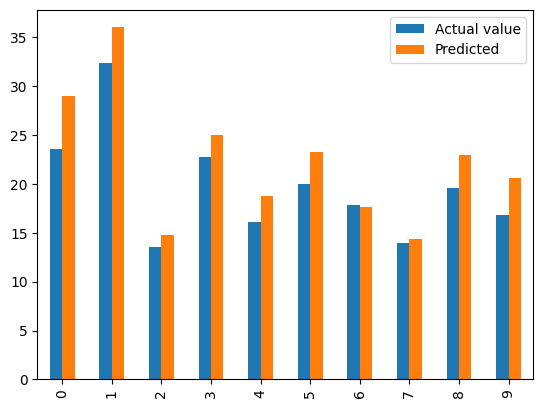

In [18]:
# difference between test value and predicted value
data_pred_df = pd.DataFrame({"Actual value": y_test, "Predicted": y_pred}).reset_index(drop=True)
data_pred_df.head(10).plot(kind='bar')

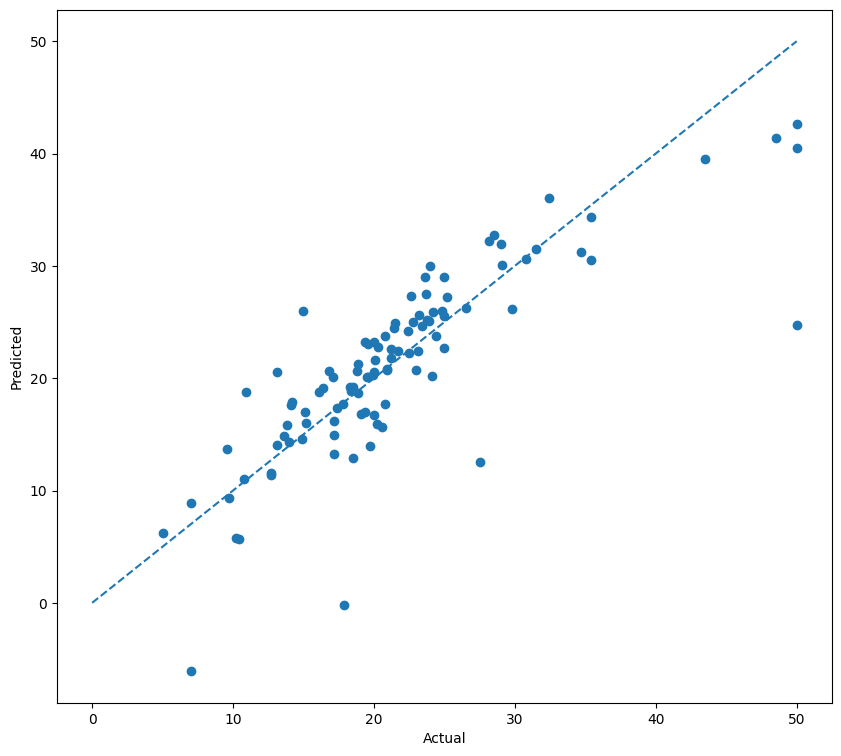

In [20]:
# another way of representing similar information
fig, ax = plt.subplots(figsize=(10,9))
ax.scatter(y_test, y_pred)
ax.plot([0,50], [0,50], linestyle="--")
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

### Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(reg_all, X_train, y_train, cv=10)
cv_scores

array([0.78005109, 0.79231329, 0.75452641, 0.29904458, 0.78702938,
       0.72324517, 0.84606865, 0.66835141, 0.79974401, 0.5362705 ])

In [26]:
cv_scores.mean()

0.6986644490108913

In [45]:
metrics_df = pd.DataFrame()
for elem in [5, 8, 10, 15, 20]:
    cv_scores = cross_val_score(reg_all, X_train, y_train, cv=elem)
    temp_df = pd.DataFrame()
    temp_df["cv"] = [elem]
    temp_df["avg_score"] = [cv_scores.mean()]
    metrics_df = metrics_df.append(temp_df).reset_index(drop=True)

metrics_df

,cv,avg_score
0,5,0.724436
1,8,0.723505
2,10,0.698664
3,15,0.705553
4,20,0.682848


#### Ridge Regression to control bias-variance tradeoff

In [46]:
from sklearn.linear_model import Ridge
ridge = Ridge(normalize=True)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
r2_score_train_ridge = ridge.score(X_train, y_train)
r2_score_test_ridge = ridge.score(X_test, y_test)
print(f"Training score: {r2_score_train_ridge} Test Score: {r2_score_test_ridge}")

Training score: 0.6455308110733852 Test Score: 0.6131761189153752


In [47]:
# Using alpha in the settings
import numpy as np
ridge = Ridge(normalize=True)
alphas = np.logspace(-3,3,10)
coeff = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coeff.append(ridge.coef_)


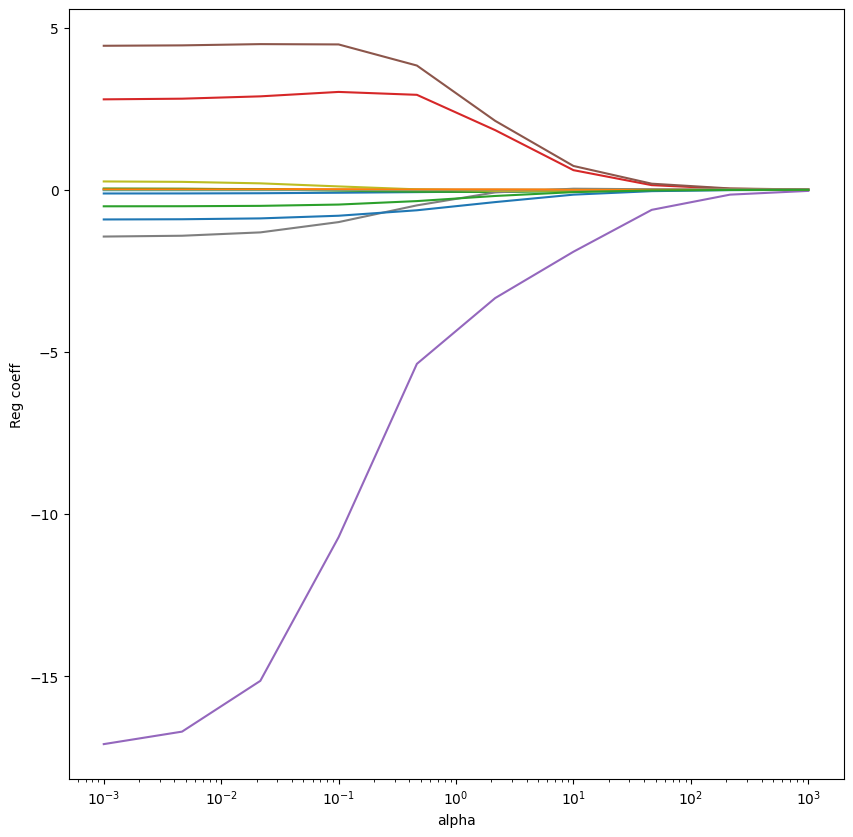

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(alphas, coeff)
ax.set_xlabel('alpha')
ax.set_ylabel('Reg coeff')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.show()

Above is an example of setting a hyperparameter for Ridge model
Other than Ridge, some other regularized models are: Lasso Regression, or a combination of Ridge and Lasso, i.e. Elastic Net

Now, we use GridSearch to perform cross validation, and attempt to find out the best value for alpha in Ridge

In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": np.logspace(-3,3,10)}
grid = GridSearchCV(ridge, param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(alpha=1000.0, normalize=True),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             return_train_score=True)

In [50]:
# best training score using the best alpha would be
grid.best_score_
# this is better than the default score which was 0.64

0.6995263634539467

In [52]:
# the alpha param to use to get this score is
grid.best_params_

{'alpha': 0.021544346900318832}

In [57]:
# now testing the same to verify that it works as expected
ridge_with_alpha = Ridge(normalize=True,)
ridge_with_alpha.set_params(alpha=0.021544346900318832)
ridge_with_alpha.fit(X_train, y_train)

y_pred_ridge = ridge_with_alpha.predict(X_test)
r2_score_train_ridge_with_alpha = ridge_with_alpha.score(X_train, y_train)
r2_score_test_ridge_with_alpha = ridge_with_alpha.score(X_test, y_test)
print(f"Training score: {r2_score_train_ridge_with_alpha} Test Score: {r2_score_test_ridge_with_alpha}")


Training score: 0.7500643166253758 Test Score: 0.6662962707026205
